## A) Import libs 

In [1]:
#import libs
import numpy as np 
import torch 
import matplotlib.pyplot as plt 

# import files 
from DataSet import DataSet
from DataGen import DataGen  
from DataGen import DataGen
from utilities import map_plot

## B) Load matlab data with DataSet class

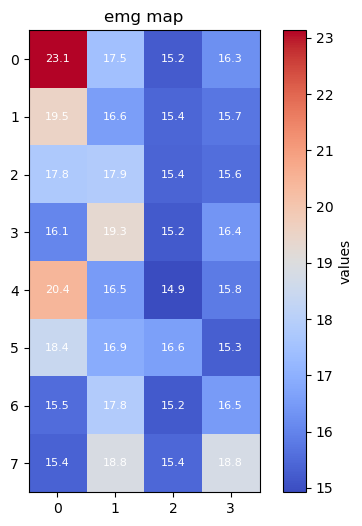

In [15]:
# Load dataset and extract relevant data
ds = DataSet('data/', 'rat', 'rat6_M1_200218.mat', 'rat6')  # Initialize the dataset with the path, animal type, file, and dataset name
ds.load_matlab_data()  # Load the data from the specified MATLAB file

emg = 4

# Extract relevant variables from the dataset
ch2xy = ds.set['ch2xy']  # Channel to (x, y) position mapping
sorted_respMean = ds.set['sorted_respMean']  # Sorted response means
output = sorted_respMean[:, emg]  # Select the 5th column of the sorted response means, i.e. the responses of the 5th emg 

# Initialize an empty map for EMG values, with shape based on the maximum x and y positions
map_emg = np.full((np.max(ch2xy[:, 0]), np.max(ch2xy[:, 1])), np.nan)

# Loop over each channel and assign its response mean value to the corresponding position in the EMG map
for i in range(ch2xy.shape[0]):
    # Convert the (x, y) position to zero-based indices and set the EMG value at that position
    map_emg[int(ch2xy[i, 0] - 1), int(ch2xy[i, 1] - 1)] = output[i]

# Plot the generated EMG map using the previously defined map_plot function
map_plot(map_emg, 'emg map')

## C) Generate data for the NN with DataGen class

In [16]:
name = 'A_10que_10kcomb_rat6_emg4'

In [17]:
dg = DataGen(map_emg)
dg.generate_pre_labeled_inputs(name=name, nb_queries=10, nb_comb=10000, 
                               kernel_type='Mat52', noise_std=0.1, 
                               output_std=3, lengthscale=[1.*1/7, 1.*1/3])
dg.format_labeled_inputs(name=name)

These pre-labeled inputs were made with these parameters:
 name: A_10que_10kcomb_rat6_emg4
 nb_queries: 10
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]


## D) Generate data for the NN with DataGen class for all the EMGs of 1 rat

In [20]:
# Load dataset and extract relevant data
ds = DataSet('data/', 'rat', 'rat5_M1_191112.mat', 'rat5')  # Initialize the dataset with the path, animal type, file, and dataset name
ds.load_matlab_data()  # Load the data from the specified MATLAB file

for emg in range(len(ds.set['emgs'])):

    # Extract relevant variables from the dataset
    ch2xy = ds.set['ch2xy']  # Channel to (x, y) position mapping
    sorted_respMean = ds.set['sorted_respMean']  # Sorted response means
    output = sorted_respMean[:, emg]  # Select the 5th column of the sorted response means, i.e. the responses of the 5th emg 

    # Initialize an empty map for EMG values, with shape based on the maximum x and y positions
    map_emg = np.full((np.max(ch2xy[:, 0]), np.max(ch2xy[:, 1])), np.nan)

    # Loop over each channel and assign its response mean value to the corresponding position in the EMG map
    for i in range(ch2xy.shape[0]):
        # Convert the (x, y) position to zero-based indices and set the EMG value at that position
        map_emg[int(ch2xy[i, 0] - 1), int(ch2xy[i, 1] - 1)] = output[i]

    name = f'A_10que_10kcomb_{ds.dataset_name}_emg{emg+1}'

    dg = DataGen(map_emg)
    dg.generate_pre_labeled_inputs(name=name, nb_queries=10, nb_comb=10000, 
                                kernel_type='Mat52', noise_std=0.1, 
                                output_std=3, lengthscale=[1.*1/7, 1.*1/3])
    dg.format_labeled_inputs(name=name)


These pre-labeled inputs were made with these parameters:
 name: A_10que_10kcomb_rat5_emg1
 nb_queries: 10
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]
These pre-labeled inputs were made with these parameters:
 name: A_10que_10kcomb_rat5_emg2
 nb_queries: 10
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]
These pre-labeled inputs were made with these parameters:
 name: A_10que_10kcomb_rat5_emg3
 nb_queries: 10
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]
These pre-labeled inputs were made with these parameters:
 name: A_10que_10kcomb_rat5_emg4
 nb_queries: 10
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]
These pre-labeled inputs were made with these parameters:
 name: A_10que_10kcomb

## E) Group all the EMGs file for 1 rat in a single file

In [ ]:
def concatenate_and_save(input_files, output_file):
    """
    Concatenates data from multiple files and saves it into a single file.

    Args:
        input_files (list of str): List of paths to the input files to load.
        output_file (str): Path to the output file where concatenated data will be saved.
    """
    # Initialize lists to store concatenated data
    all_train_input = []
    all_train_label = []
    all_descriptions = []

    # Load and concatenate data
    for file in input_files:
        loaded_data = torch.load(file, weights_only=True)  # Load data from file
        all_train_input.append(loaded_data["train_input"])  # Append train inputs
        all_train_label.append(loaded_data["train_label"])  # Append train labels
        all_descriptions.append(loaded_data["description"])  # Append descriptions

    # Concatenate tensors and descriptions
    concatenated_train_input = torch.cat(all_train_input, dim=0)  # Concatenate train inputs
    concatenated_train_label = torch.cat(all_train_label, dim=0)  # Concatenate train labels
    concatenated_description = "; ".join(all_descriptions)  # Combine descriptions

    # Save concatenated data into a single file
    output_data = {
        "train_input": concatenated_train_input,
        "train_label": concatenated_train_label,
        "description": concatenated_description,
    }
    torch.save(output_data, output_file)

    print(f"Data has been saved to {output_file}")

# Example usage

num_rat = 5
nb_k_comb = 10
nb_queries = 10

input_files = [
    f"dataset/single_map/og_A_{nb_queries}que_{nb_k_comb}kcomb_rat{num_rat}_emg1.pth",
    f"dataset/single_map/og_A_{nb_queries}que_{nb_k_comb}kcomb_rat{num_rat}_emg2.pth",
    f"dataset/single_map/og_A_{nb_queries}que_{nb_k_comb}kcomb_rat{num_rat}_emg3.pth",
    f"dataset/single_map/og_A_{nb_queries}que_{nb_k_comb}kcomb_rat{num_rat}_emg4.pth",
    f"dataset/single_map/og_A_{nb_queries}que_{nb_k_comb}kcomb_rat{num_rat}_emg5.pth",
    # f"dataset/single_map/og_A_{nb_queries}que_{nb_k_comb}kcomb_rat{num_rat}_emg6.pth",
    # f"dataset/single_map/og_A_{nb_queries}que_{nb_k_comb}kcomb_rat{num_rat}_emg7.pth",
    # f"dataset/single_map/og_A_{nb_queries}que_{nb_k_comb}kcomb_rat{num_rat}_emg8.pth",
]
output_file = f"dataset/emgALL/og_A_{nb_queries}que_{nb_k_comb}kcomb_rat{num_rat}_emgALL.pth"
concatenate_and_save(input_files, output_file)


Les données ont été sauvegardées dans dataset/emgALL/og_A_10que_10kcomb_rat5_emgALL.pth
